In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
def equation_to_fit(x, basal, maximal, Kd, n):
    return basal + maximal * (x**n / (Kd + x**n))

def log_equation_to_fit(x, basal, maximal, Kd, n):
    return np.log10(equation_to_fit(x, basal, maximal, Kd, n))
# Unfortunately this is a necessary hack because the curve_fit function doesn't allow you to input function(function)

list_of_params_to_fit = ['Basal', 'Max', 'Kd', 'n']

In [3]:
def report_paramaters(fit_param_names, fit_param_values, fit_param_stdevs):
    for each in range(len(fit_param_names)):
        print(fit_param_names[each], 'is', fit_param_values[each], 'with a standard deviation of', fit_param_stdevs[each])

In [4]:
'''Import the data'''
path = "/Users/Weiss Lab/Documents/Jupyter Notebooks/Curve-Fitting/HillTestData.xlsx"
#path = "/Users/Nicholas/Documents/Jupyter Notebooks/Curve-Fitting/HillTestData.xlsx"
MyData = pd.read_excel(path)
######################## Some reminders ####################################
# MyData                                    # Shows the entire dataframe
# MyData.x                                  # Data of column called "x"
# MyData.iloc[0,:]                          # First row
# MyData.iloc[:,0]                          # First column
# MyData.columns[0]                         # Name of first column
# MyData['Seconds'] = 3600 * MyData.Hours   # Create a new column named as such and caluclated as such

In [5]:
'''Return the fitted paramaters and their covariance for the fitted curve'''
init_guess = [100, 100, 100, 2]
low_bounds = [0, 0, 0, 0]
up_bounds = [1000000, 1000000, 1000000, 10]
fit_params, covar = curve_fit(log_equation_to_fit, MyData.iloc[:,0], np.log10(MyData.iloc[:,1]), p0 = init_guess, bounds=(low_bounds, up_bounds))
# Fitting the log of the data to the log of the equation removes bias towards the high points by the residuals
# Treats the data more equally; allow accurate basal parameter estimation with minimal loss of accuracy of the maximal expression

std_dev_error_of_fit_params = np.sqrt(np.diag(covar))
report_paramaters(list_of_params_to_fit, fit_params, std_dev_error_of_fit_params)

Basal is 3.16060910017 with a standard deviation of 0.658915315202
Max is 621.028427072 with a standard deviation of 83.1091200607
Kd is 11.6884396914 with a standard deviation of 2.79068068988
n is 1.04083542696 with a standard deviation of 0.118482167172


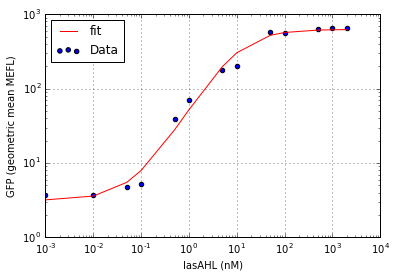

In [6]:
plt.scatter(MyData.iloc[:,0], MyData.iloc[:,1], c='b', label='Data')
plt.plot(MyData.iloc[:,0], equation_to_fit(MyData.iloc[:,0], *fit_params), c='r', label='fit')
plt.xlabel(MyData.columns[0])
plt.ylabel(MyData.columns[1])
plt.legend(loc = 'best')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()